# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


###  Import Statements


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [4]:
df_data = pd.read_csv('NLSY97_subset.csv')
df_data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,nan,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print("Shape of the df_data is", df_data.shape)
print(f"It has {df_data.shape[0]} rows and {df_data.shape[1]} columns")

Shape of the df_data is (2000, 96)
It has 2000 rows and 96 columns


In [6]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [7]:
df_data.duplicated().values.any()

True

In [8]:
df_data.isna().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [9]:
df_data.drop_duplicates(inplace=True)

In [10]:
# NaN values after dropping duplicates
df_data.isnull().sum()

ID          0
EARNINGS    0
S           0
EXP         0
FEMALE      0
           ..
MSA11NO     0
MSA11NCC    0
MSA11CC     0
MSA11NK     0
MSA11NIC    0
Length: 96, dtype: int64

## Descriptive Statistics

In [11]:
df_data.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


## Visualise the Features

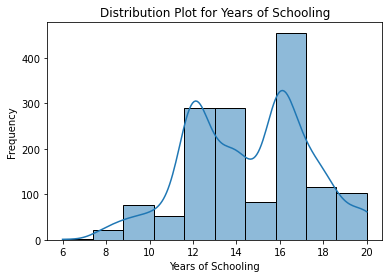

In [12]:
# Distribution plot for Years of Schooling
sns.histplot(df_data['S'], bins=10, kde=True)
plt.xlabel("Years of Schooling")
plt.ylabel("Frequency")
plt.title("Distribution Plot for Years of Schooling")
plt.show()

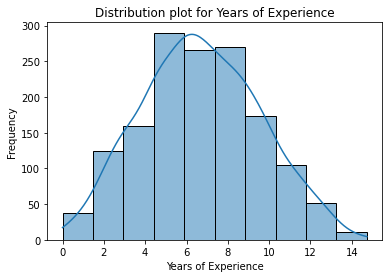

In [13]:
# Distribution plot for Years of Experience
sns.histplot(df_data['EXP'], bins=10, kde=True)
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Distribution plot for Years of Experience')
plt.show()

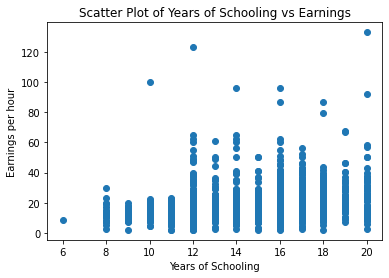

In [14]:
# Scatter plot of Years of Schooling vs Earnings

plt.scatter(x='S', y='EARNINGS', data=df_data)
plt.xlabel('Years of Schooling')
plt.ylabel('Earnings per hour')
plt.title("Scatter Plot of Years of Schooling vs Earnings")
plt.show()

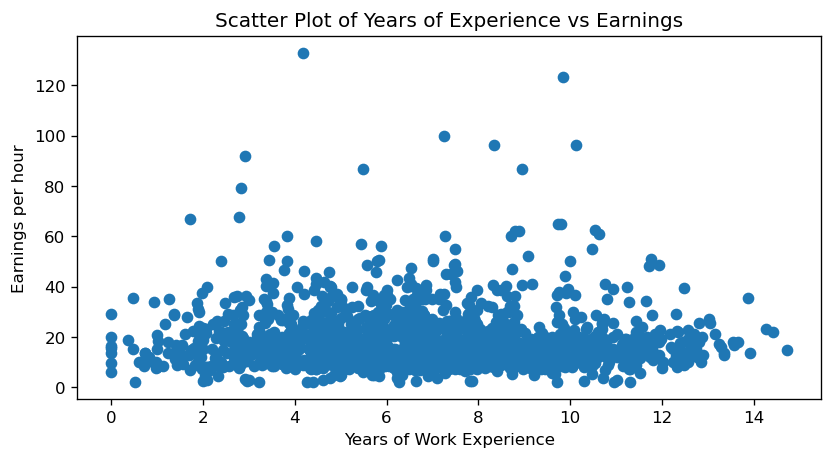

In [15]:
# Scatter Plot of Years of Experience vs Earnings
plt.figure(figsize=(8,4), dpi=120)
plt.scatter(x='EXP', y='EARNINGS', data=df_data)
plt.xlabel('Years of Work Experience')
plt.ylabel('Earnings per hour')
plt.title('Scatter Plot of Years of Experience vs Earnings')
plt.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [16]:
X = df_data[['S', 'EXP']]
y = df_data['EARNINGS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [17]:
# Create and fit the linear regression
model = LinearRegression()
model.fit(X_train[['S']], y_train)

LinearRegression()

In [18]:
# R-Squared for the regression on training data
r_squared = model.score(X_train[['S']], y_train)
print("R-Squared for the regression n training data", r_squared)

R-Squared for the regression n training data 0.08311636185982574


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [19]:
coeffiecients = model.coef_
print("Coeffiecients of the model: ", coeffiecients)

Coeffiecients of the model:  [1.27071624]


In [20]:
# Interpretation of the regression coeffiecient
print("For each additional year of schooling, the expected change in earnings is $", coeffiecients[0])

For each additional year of schooling, the expected change in earnings is $ 1.2707162397223009


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [21]:
X_train[['S']].shape

(1189, 1)

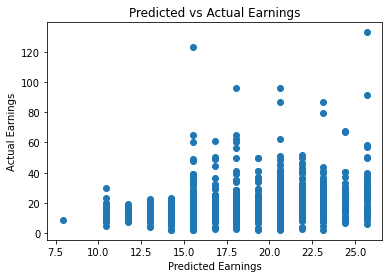

In [22]:
# Analyse Estimated Values
y_train_pred = model.predict(X_train[['S']]) # Predicted Earnings

plt.scatter(y_train_pred, y_train) # Scatter Plot of Predicted vs Actual Earnings
plt.xlabel('Predicted Earnings')
plt.ylabel('Actual Earnings')
plt.title("Predicted vs Actual Earnings")
plt.show()

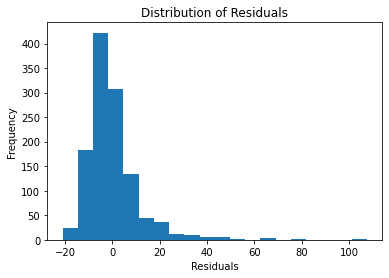

In [23]:
# Analyse Regression Residuals
residuals = y_train - y_train_pred  # Calculate residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

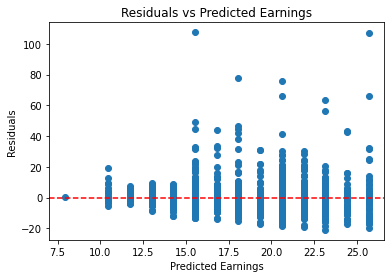

In [24]:
# Scatter Plot of residuals vs predicted earnings
plt.scatter(y_train_pred, residuals)
plt.xlabel("Predicted Earnings")
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Earnings')
plt.axhline(y=0, color='red', linestyle='--') #Add horizontal line at y=0 for reference
plt.show()

# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [25]:
from sklearn.metrics import r2_score

In [26]:
# Fit the multivariable regression model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Predict earnings on the training data
y_train_pred = model.predict(X_train)
y_train_pred

array([16.3977773 , 22.33838728, 17.40106869, ..., 19.27443455,
       18.38532811, 25.15493913])

In [28]:
# Calculate R_squared for the model
r2 = r2_score(y_train, y_train_pred)
print('R-Squared on training data is', r2)

R-Squared on training data is 0.11945638211009058


### Evaluate the Coefficients of the Model

In [29]:
coefficients = model.coef_
coefficients

array([1.84331414, 0.98959959])

In [30]:
for i in range(len(coefficients)):
    print("Coefficient for {}: {:.2f}".format(X_train.columns[i], coefficients[i]))

Coefficient for S: 1.84
Coefficient for EXP: 0.99


### Analyse the Estimated Values & Regression Residuals

In [31]:
# Predict Earnings on training data
y_train_pred = model.predict(X_train)

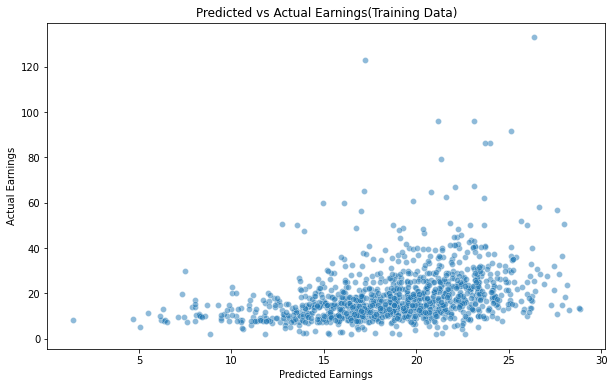

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_pred, y=y_train, alpha=0.5)
plt.xlabel("Predicted Earnings")
plt.ylabel("Actual Earnings")
plt.title("Predicted vs Actual Earnings(Training Data)")
plt.show()

In [33]:
# Calculate Residuals
residuals = y_train - y_train_pred
residuals

1428   -1.83
978    -9.02
939    -5.29
411     3.61
631    -1.69
        ... 
1219   -0.94
1556   11.80
860    -5.77
1921   -7.89
1213   -9.70
Name: EARNINGS, Length: 1189, dtype: float64

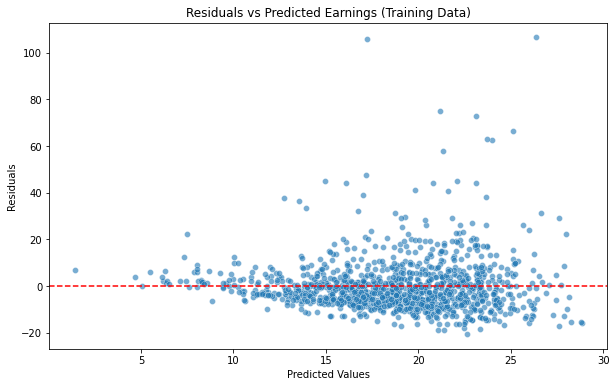

In [34]:
# Plot residuals vs Predicted Values
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Earnings (Training Data)")
plt.show()

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [35]:
years_of_schooling = 12 + 4  # Bachelors degree(12 years) + 4 years of additional schooling
years_of_experience = 5 

In [36]:
# Create new data point for prediction
new_data = pd.DataFrame({'Years_Schooing':[years_of_schooling], 'Years_Work_Experience':[years_of_experience]})

In [37]:
# Use model to make a prediction for 2011
predicted_earnings_2011 = model.predict(new_data)

In [38]:
# Print predicted earnings for 2011
print("Predicted Earnings for 2011: $", predicted_earnings_2011[0])

Predicted Earnings for 2011: $ 19.793604523163687


# Experiment and Investigate Further

Which other features could you consider adding to further improve the regression to better predict earnings? 